In [1]:
import matplotlib.pyplot as plt 
import numpy as np 


plt.rcParams['figure.dpi'] = 150

In [2]:

def correctFunction(x): 
    return 15 + 2.4*np.sin(x)  


In [3]:
# Create the data
xdata = np.linspace(-10,10,101)
data = np.array([xdata,correctFunction(xdata)])

# Perturbation 
P = np.array(((2*np.random.rand(101))-1))

# Perturbed data 

dataP = np.array([xdata, data[1]+ P ])

The function we try to fit: $ f(x) = \sum_{k=0}^n a_k sin(x)^k$), the error function: $ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2 $

In [4]:
def TestModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * np.sin(x)**k
    return t

def errorFit(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error + ( data[1,i] - f( data[0,i], coefficients ))**2
    return error

def errorFitGradient(f,coefficients,data):
    
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [5]:
a0 = np.array([15,2.4])

In [6]:
errorFit(,dataP)

SyntaxError: invalid syntax (<ipython-input-6-96fae78d58f7>, line 1)

In [12]:
iterations = 10000
h = 0.00001
a = np.array([1,1])
Error = []

for i in range(iterations):
    
    a = a  - h * errorFitGradient(TestModel,a, dataP)
    Error.append(errorFit(TestModel,a,dataP))
print(a,i)

[15.06159879  1.95934904] 9999


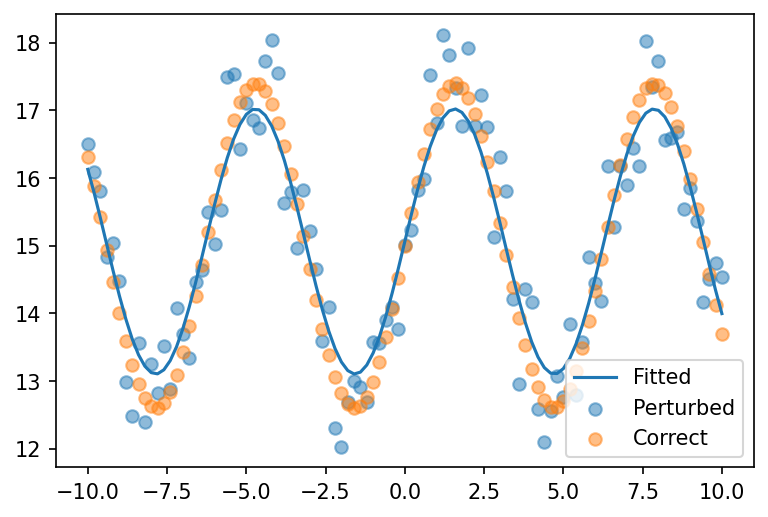

In [13]:
plt.scatter(xdata,dataP[1],label='Perturbed',alpha = 0.5)
plt.scatter(xdata,data[1],label = 'Correct',alpha= 0.5)
plt.plot(xdata,TestModel(xdata,a),label='Fitted')
plt.legend()

In [14]:
print(errorFit(TestModel,a,dataP))
print(errorFit(TestModel,a0,dataP))

37.30174013173354
33.14414944978581


Text(0, 0.5, 'Error')

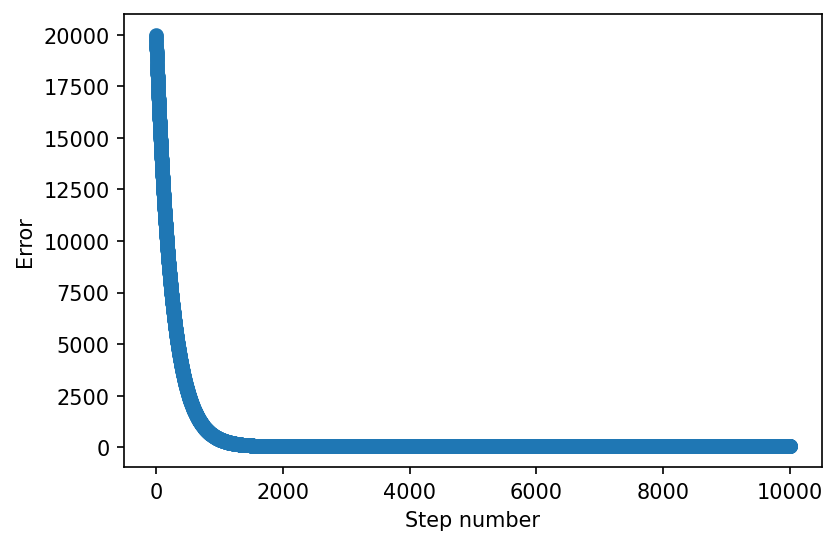

In [16]:
plt.scatter([i for i in range(len(Error))],Error)
plt.xlabel("Step number")
plt.ylabel("Error")